# Tutorial 09 – Linear Models

In this tutorial we will take a look at linear models both for regression and classification.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()  # make plots nicer

## Linear Regression

The basic idea of linear models is to make linear combinations of feature values and use them for prediction. In case of linear regression the combination is directly the prediction. Formally,

$$ y = X \cdot w = 1w_0 + x_1w_1 + x_2w_2 + x_3w_3 \ldots + x_nw_n$$

where $X$ are input the feature vectors, $w$ are coefficients learned by the model and $y$ are targets. $w_0$ is called intercept and it shifts the predictions so that the targets does not have to be normalized.

Let's take a look at linear regression in practice. We have a data about CO2 concentrations over the hundreds of years. Let's see if how well the linear model will fit this data.

In [2]:
co2 = pd.read_csv("https://www.fi.muni.cz/~xcechak1/IB031/datasets/CO2.csv")
co2.head()

,Year,CO2
0,1764,276.7
1,1791,279.7
2,1816,283.8
3,1839,283.1
4,1843,287.4


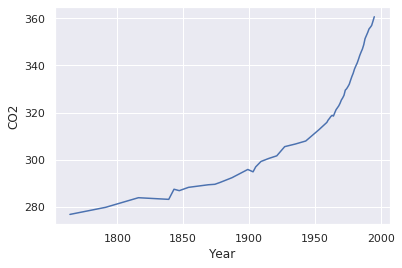

In [3]:
sns.lineplot(data=co2, x="Year", y="CO2")

In [4]:
co2_X, co2_y = co2.drop(columns="CO2"), co2.CO2

Now we explore the possibilities of linear models. It is not necessary to split the dataset now. The goal is to observe how well the model can fit the training data.

<div class="alert alert-block alert-warning"><b>Exercise 1</b></div>

Use [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model to fit the data. Predict the CO2 level using the model and **save the predictions** into variable called `predicted_co2`. Evaluate the model using **RMSE**

You should get RMSE of $10.14$.

In [5]:
# TODO: your code goes here...
# predicted_co2 = your code goes here...
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

LinearRegression_pipeline = make_pipeline(
    LinearRegression()
)

LinearRegression_pipeline.fit(co2_X,  co2_y)
predicted_co2 = LinearRegression_pipeline.predict(co2_X)
np.round(np.sqrt(mean_squared_error(co2_y, predicted_co2)), 2)

10.14

We can visualize the fit by plotting predicted vales for each year.

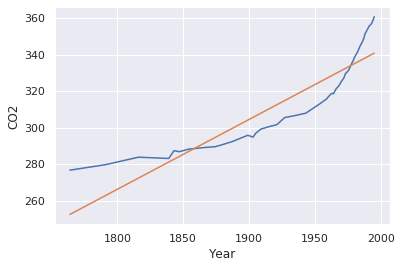

In [6]:
ax = sns.lineplot(data=co2, x="Year", y="CO2")
sns.lineplot(x=co2.Year, y=predicted_co2, ax=ax)

Clearly, this model does not have enough variance and it is unable to capture more steep increase of CO2 in the recent decades. Ideally, we would like to fit polynomials of higher degree. Luckily, linear models can do just that.

Although linear models are will always create a linear combinations of features we can manipulate the features and create new ones to navigate around this limitation. We can introduce a new feature that is a second power of original `year`.

In [7]:
co2["year^2"] = co2.Year ** 2
co2_X = co2.drop(columns="CO2")

<div class="alert alert-block alert-warning"><b>Exercise 2</b></div>

Run the same code from Exercise 1 but this time save the prediction into variable `predicted_co2_2`.

You should get RMSE of $5.64$.

In [8]:
# TODO: your code goes here...
# predicted_co2_2 = your code goes here...
LinearRegression_pipeline.fit(co2_X, co2_y)
predicted_co2_2 = LinearRegression_pipeline.predict(co2_X)
np.round(np.sqrt(mean_squared_error(co2_y, predicted_co2_2)),2)

5.64

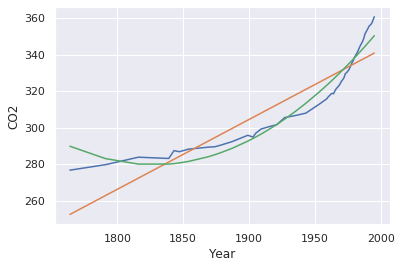

In [9]:
ax = sns.lineplot(data=co2, x="Year", y="CO2")
sns.lineplot(x=co2.Year, y=predicted_co2, ax=ax)
sns.lineplot(x=co2.Year, y=predicted_co2_2, ax=ax)

The new model has half the RMSE of previous model and event the prediction on the plot are much closer to the actual CO2 values. Using polynomials of features is a common practice with linear models and there is even a transformer in `scikit-learn` just for this.

In [10]:
if "year^2" in co2.columns:
    co2 = co2.drop(columns="year^2")

<div class="alert alert-block alert-warning"><b>Exercise 3</b></div>

Use [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to generate degree-4 polynomial features. Then fit the linear regression just like in previous exercises and save the prediction into variable `predicted_co2_3`.

You should get RMSE of $1.38$.

In [11]:
# TODO: your code goes here...
# predicted_co2_3 = your code goes here...
from sklearn.preprocessing import PolynomialFeatures

LinearRegression_pipeline_2 = make_pipeline(
    PolynomialFeatures(degree=4),
    LinearRegression_pipeline
)

LinearRegression_pipeline_2.fit(co2_X, co2_y)
predicted_co2_3 = LinearRegression_pipeline_2.predict(co2_X)
np.round(np.sqrt(mean_squared_error(co2_y, predicted_co2_3)), 2)

1.38

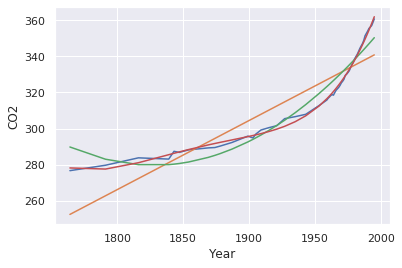

In [12]:
ax = sns.lineplot(data=co2, x="Year", y="CO2")
sns.lineplot(x=co2.Year, y=predicted_co2, ax=ax)
sns.lineplot(x=co2.Year, y=predicted_co2_2, ax=ax)
sns.lineplot(x=co2.Year, y=predicted_co2_3, ax=ax)

The last model produces much closer fit. We could increase the polynomials' degree for better fit but that this could result in overfitting. There are statistical tests (t-test) and methods to test when the model is too complex (ANOVA) but those are out of scope of this tutorial.

Now let's generalize to multiple features. We have a dataset about cars our goal is to predict how much miles per gallon a car can make based on the rest of the car's features.

In [13]:
cars = sns.load_dataset("mpg")
display(cars.head())
cars.info()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Columns `origin` and `name` are impractical to use in linear model so we ignore them. 

In [14]:
cars_X, cars_y = (
    cars[
        [
            "cylinders",
            "displacement",
            "horsepower",
            "weight",
            "acceleration",
            "model_year",
        ]
    ],
    cars.mpg,
)

In [15]:
from sklearn.model_selection import train_test_split

cars_train_X, cars_test_X, cars_train_y, cars_test_y = train_test_split(
    cars_X, cars_y, test_size=0.2, random_state=42
)

<div class="alert alert-block alert-warning"><b>Exercise 4</b></div>

Use the linear regression to predict the miles per gallon of cars. Save the predictions into variable `cars_test_predicted` and evaluate the model using **RMSE** on test set.

You should get RMSE of $3.07$.

In [16]:
# TODO: your code goes here...
from sklearn.impute import SimpleImputer

LinearRegression_pipeline_3 = make_pipeline(
    SimpleImputer(strategy='mean'),
    LinearRegression()
)

LinearRegression_pipeline_3.fit(cars_train_X, cars_train_y)
cars_test_predicted = LinearRegression_pipeline_3.predict(cars_test_X)
np.round(np.sqrt(mean_squared_error(cars_test_y, cars_test_predicted)), 2)

3.07

Although we cannot easily visualize the hyperplane in six dimensions we can visualize the predictions and actual targets.

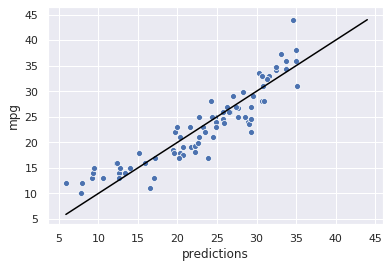

In [17]:
def plot_scatter(true_y, predicted_y):
    min_value = min(true_y.min(), predicted_y.min())
    max_value = max(true_y.max(), predicted_y.max())

    plt.plot(
        [min_value, max_value], [min_value, max_value], c="black",
    )
    plt.xlabel("predictions")
    sns.scatterplot(x=predicted_y, y=true_y)


plot_scatter(cars_test_y, cars_test_predicted)

Ideally, all the points should be on the black line. Then our predictions would be perfect. This is not the case and there is a slight upward "curve" in the data. Therefore, we might improve the model using polynomial features.

<div class="alert alert-block alert-warning"><b>Exercise 5</b></div>

Extend the model from Exercise 4 with `PolynomialFeatures` transformer generating degree-4 polynomials. Evaluate the model using **RMSE** on test set and visualize the result using **scatter plot**.

You should get RMSE of $31.48$.

30.35

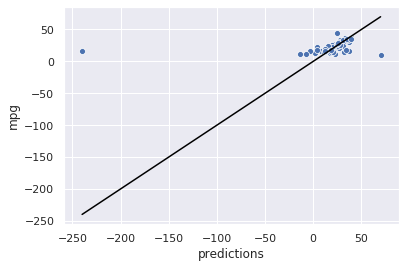

In [18]:
# TODO: your code goes here...
LinearRegression_pipeline_4 = make_pipeline(
    SimpleImputer(strategy='mean'),
    PolynomialFeatures(degree=4),
    LinearRegression()
)

LinearRegression_pipeline_4.fit(cars_train_X, cars_train_y)
cars_test_predicted_2 = LinearRegression_pipeline_4.predict(cars_test_X)
plot_scatter(cars_test_y, cars_test_predicted_2)
np.round(np.sqrt(mean_squared_error(cars_test_y, cars_test_predicted_2)), 2)

The RMSE is much worse mainly due to the single outlier. This, however, illustrates that outlying values are amplified in polynomials as higher powers of extreme values become more extreme. We now have two possibilities:
1. remove the outlier, or
2. select only a subset of polynomial features.

Let's go with option 2.

<div class="alert alert-block alert-warning"><b>Exercise 6</b></div>

Extend the model from Exercise 5 with feature selection that will keep **40 best** performing features. Evaluate the model using **RMSE** on test set and visualize the result using **scatter plot**.

You should get RMSE of $2.55$.

2.55

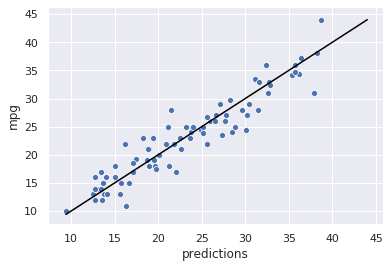

In [19]:
# TODO: your code goes here...
from sklearn.feature_selection import SelectKBest

LinearRegression_pipeline_5 = make_pipeline(
    SimpleImputer(strategy='mean'),
    PolynomialFeatures(degree=4),
    SelectKBest(k=40),
    LinearRegression()
)


LinearRegression_pipeline_5.fit(cars_train_X, cars_train_y)
cars_test_predicted_3 = LinearRegression_pipeline_5.predict(cars_test_X)
plot_scatter(cars_test_y, cars_test_predicted_3)
np.round(np.sqrt(mean_squared_error(cars_test_y, cars_test_predicted_3)), 2)

The points are now much more straight and closer to the ideal black line. RMSE has also improved.

Instead of explicitly selecting features we can use a modification of linear regression called Lasso. Lasso adds L1 regularization to coefficients ($w_i$) that forces them to be small and zero if possible. This acts as feature selection where only non-zero coefficients mark "selected" features.

<div class="alert alert-block alert-warning"><b>Exercise 7</b></div>

Extend and modify the model from Exercise 5 to use [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) instead of `LinearRegression` and standardize the polynomial features. Evaluate the model using **RMSE** on test set and visualize the result using **scatter plot**. Find out which features have non-zero coefficients.

You should get RMSE of $2.87$.

2.87
-3.3197643523306146 x3
-0.8116955222223896 x1 x4
-0.8093174311694836 x2 x4
0.5509697272202186 x4 x5^3
1.763995901036271 x5^4


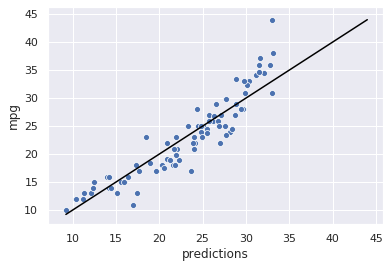

In [20]:
# TODO: your code goes here...
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

Lasso_pipeline = make_pipeline(
    LinearRegression_pipeline_4[:-1],
    StandardScaler(),
    Lasso()
)

Lasso_pipeline.fit(cars_train_X, cars_train_y)
cars_test_predicted_4 = Lasso_pipeline.predict(cars_test_X)
plot_scatter(cars_test_y, cars_test_predicted_4)
print(np.round(np.sqrt(mean_squared_error(cars_test_y, cars_test_predicted_4)), 2))
zipped = zip(Lasso_pipeline[-1].coef_, Lasso_pipeline[-3][-1].get_feature_names())
for a,b in zipped:
    if a != 0:
        print(a,b)

The RMSE is a bit worse but Lasso is using only 5 features instead of 40.

## Robust Regression

Basic linear regression is fairly sensitive to outliers. This is due to the fact that it optimizes sum of square errors. Square errors of outliers are particularly big and the model tries to compensate for it. Luckily, there are more robust versions of linear regression that are not that sensitive to outliers.

We explore this weakness on the following synthetic dataset.

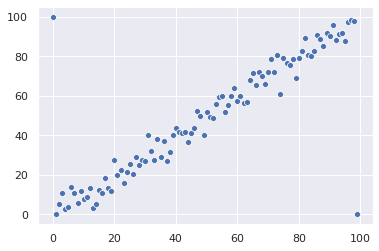

In [21]:
np.random.seed(42)
X = np.arange(100)
y = X + np.random.normal(0, 5, 100)
y[0] = 100
y[99] = 0
sns.scatterplot(x=X, y=y)

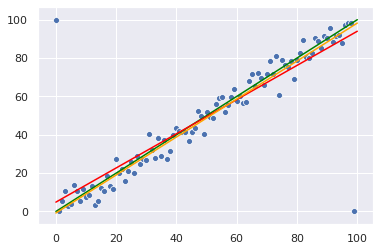

In [22]:
from sklearn.linear_model import TheilSenRegressor

lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)

ts = TheilSenRegressor()
ts.fit(X.reshape(-1, 1), y)


plt.plot([0, 100], [0, 100], c="green")
plt.plot([0, 100], lr.predict([[0], [100]]), c="red")
plt.plot([0, 100], ts.predict([[0], [100]]), c="orange")
sns.scatterplot(x=X, y=y)

The green line is the ground truth that the model should ideally discover. The red line is basic linear regression and it is rotated in the direction of outliers. The orange line is Theil-Sen estimator that is one of the robust estimators. The orange line is much closer to the ground truth green line.

## Logistic regression

Despite its name, logistic regression is used for classification. It is still considered a linear model as the main component is the linear combination of features that is then transformed using logistic function. This results in the output in range [0, 1] that is interpreted as probability. Formally

$$ P(y=1) = \sigma(X \cdot w) = \frac{1}{1 + e^{-X \cdot w}} $$

where $X$ are input features, $w$ are coefficients, and $P(y=1)$ is probability that the class label for the given example is 1.

Let's try logistic regression for classifying diabetes.

In [23]:
diabetes = pd.read_csv("https://www.fi.muni.cz/~xcechak1/IB031/datasets/diabetes.csv")

diabetes.Glucose.replace(0, np.nan, inplace=True)
diabetes.BloodPressure.replace(0, np.nan, inplace=True)
diabetes.SkinThickness.replace(0, np.nan, inplace=True)
diabetes.Insulin.replace(0, np.nan, inplace=True)
diabetes.BMI.replace(0, np.nan, inplace=True)

diabetes.dropna(inplace=True)
diabetes.reset_index(drop=True, inplace=True)

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [24]:
diabetes_X, diabetes_y = diabetes.drop(columns="Outcome"), diabetes.Outcome

diabetes_train_X, diabetes_test_X, diabetes_train_y, diabetes_test_y = train_test_split(
    diabetes_X, diabetes_y, test_size=0.2, random_state=42
)

<div class="alert alert-block alert-warning"><b>Exercise 8</b></div>

Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to classify indian with diabetes. Evaluate the model using **accuracy** and compare the accuracy with **baseline model** predicting most frequent class.

You should get accuracy of $0.77$.

In [25]:
# TODO: your code goes here...
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(diabetes_train_X, diabetes_train_y)
print(
    "most frequent label", round(dummy.score(diabetes_test_X, diabetes_test_y), 2),
)

LogisticRegression_pipeline = make_pipeline(
    LogisticRegression()
)

LogisticRegression_pipeline.fit(diabetes_train_X, diabetes_train_y)
print("Logistic Regression", round(LogisticRegression_pipeline.score(diabetes_test_X, diabetes_test_y), 2))

most frequent label 0.66
Logistic Regression 0.78
